In [1]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, exp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from Kildekode._12_IIRFilt import *
from Kildekode._14_Z_transformasjon import *

plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

%matplotlib ipympl

<img src="Figurer/NTNU_Logo.png" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Z-transformasjon del 1

* **Emne AIS2201 - Signalbehandling**
* **Uke 13, 2022**
* **Underviser: Kai Erik Hoff**

## Tema:
* Repetisjon IIR-filtre
* Kontinuerlige LTI-system, laplacetransformasjon og transferfunksjonen $H(s)$
* Diskrete LTI-system, Z-transformasjon og transferfunksjonen $H(z)$
* Transferfunksjon $H(z)$
* Transferfunksjon og frekvensrespons

## Repetisjon IIR filtre

* **IIR** - **I**nfinite **I**mpulse **R**esponse
* Fellesbetegnelse for filter som kalkulerer utgangsveriden $y[n]$ basert på en lineær kombinasjon av verdiene til inngangssignalet ved foregående sampletidspunkt $x[n-k], \ \ k\in \{0, 1, 2, \ldots\}$ ***og*** tidligere kalkulerte verdier til utgangssignalet $y[n-k], \ \ k \in \{1, 2, \ldots\}$.


* **Differanseligning:**
$$\sum_{k=0}^{N} a_k \cdot y[n-k] = \sum_{k=0}^{M} b_k \cdot x[n-k]$$
* **Filteralgoritme:**
$$y[n] = \frac{1}{a_0}\cdot \left(\sum_{k=0}^{M} b_k \cdot x[n-k] - \sum_{k=1}^{N}a_k\cdot  y[n-k] \right)$$

# Nøkkelegenskaper IIR filtre

* Impulsresponsen $h[n]$ vil som regel være eksponentielt avtagende i verdi, men aldri bli nøyaktig lik 0. 
    * $h[n]$ har altså uendelig varighet, derav navnet "Infinite Impulse Response Filter".
* Det vil finnes et analogt filter der den kontinuerlige stegresponsen er en kontinuerlig utgave av IIR-filterets diskrete stegrespons $h[n]$.
<img src="Figurer/14_Ztransform/Fig1_StepResponses.png" style="width: 80%; margin-left: 10%" />
* Design av IIR filtre kan utføres ved å ***diskretisere*** et analogt filter.
    * Design og analyse av analoge filtre gjøres ofte ved hjelp av ***laplacetransformasjon***.

# Hvordan designes IIR-filtre?

<img src="Figurer/12_IIR%20Filtre/Fig4_IIRdesign.png" style="width: 60%; margin-left: 200px" />

## notater
* Refleksjoner om laplacetransformasjon
    * *Egenfunksjonen* til et LTI-system er en funksjon $f(t)$ som kun vil multipliseres med et tall $\lambda$ når det passerer gjennom systemet.
    * Egenfunksjonen til et tidskontinuerlig LTI-system er:
    $$f(t) = e^{s\cdot t}$$
    * tidskontinuerlige LTI-system beskrives med en *differensialligning*, og ettersom  $f'(t) = s\cdot e^{s\cdot t}$, vil den totale løsningen til diffligningen også være $\lambda \cdot e^{s\cdot t}$ da diffligningen består av en lineær kombinasjon av n'te deriverte
    * Laplacetransformasjon kommer fra å utlede konvolusjon mellom impulsresponsen og egenfunksjonen
    * H(s) forteller oss altså hvilken egenverdi H som multipliseres med egenfunksjonen $f(t)$ når den passerer gjennom systemet
    * 
    

# *Laplacetransformasjon*

* *"Why does it work?"*

# Tidskontinuerlige LTI-system og konvolusjon

* Beskrevet med en *differensialligning*
    * Eksempel:

$$\frac{d^2y(t)}{d t^2} + 2\frac{d y(t)}{d t} + 10\cdot y(t) = \frac{d x(t)}{d t} + x(t) $$



* Utgangssignalet $y(t)$ til et tidskontinuerlig system vil være lik $h(t)*x(t)$
* Konvolusjonsintegralet for kausale system:

$$y(t) = \int_{0}^{\infty} x(t-\tau) \cdot h(\tau) d\tau$$

* Forklaring:

<img src="Figurer/14_Ztransform/ContConv.png" style="width: 80%; margin-left: 100px" />

## Tidskontinuerlig konvolusjon animert

In [5]:
# Hentet fra kompendie i signals_and_systems
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from Kildekode.animation import animate_convolution
class rect(sym.Function):

    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)

plt.rcParams['animation.html'] = 'jshtml'

t, tau = sym.symbols('t tau', real=True)
h = sym.exp(-t) * sym.Heaviside(t)
x = sym.Rational(3, 4) * rect(t - 1/2)
y = sym.integrate(h.subs(t, t-tau) * x.subs(t, tau), (tau, 0, t))

anim = animate_convolution(x, h, y, t, tau, np.arange(-2, 5, .1), np.arange(-5, 5, 0.02))
anim

/home/jovyan/Archive/AIS2201_Lectures/Kildekode/animation.py:38: SymPyDeprecationWarning: 

The Line2DBaseSeries.get_segments() method is deprecated.

Instead, use the MatplotlibBackend.get_segments() method, or use
The get_points() or get_data() methods.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-get-segments
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  line_x.set_segments(p[0].get_segments())


# LTI-system og *Egenfunksjoner*

* **Egenfunksjon**:
    * Inngangssignalet $x(t)$ som produserer et utgangssignal $y(t) = \lambda \cdot x(t), \ \ \lambda \in \mathbb{C}$
    * $\lambda$ er systemets *egenverdi*
    * $x(t) = e^{s\cdot t}$ er *egenfunksjonen* til LTI-system
        * **Sentral egenskap:** $\frac{d e^{s \cdot t}}{dt} = s \cdot e^{s \cdot t}$
        * $s$ er et komplekst tall: $s = \sigma + j \omega$
        * Egenverdien $\lambda$ vil avhenge av $s$, dvs.: $\lambda = \lambda(s)$
        * $\lambda(s)$ er ekvivalent med LTI-systemets *transferfunksjon*: $H(s) = \lambda(s)$

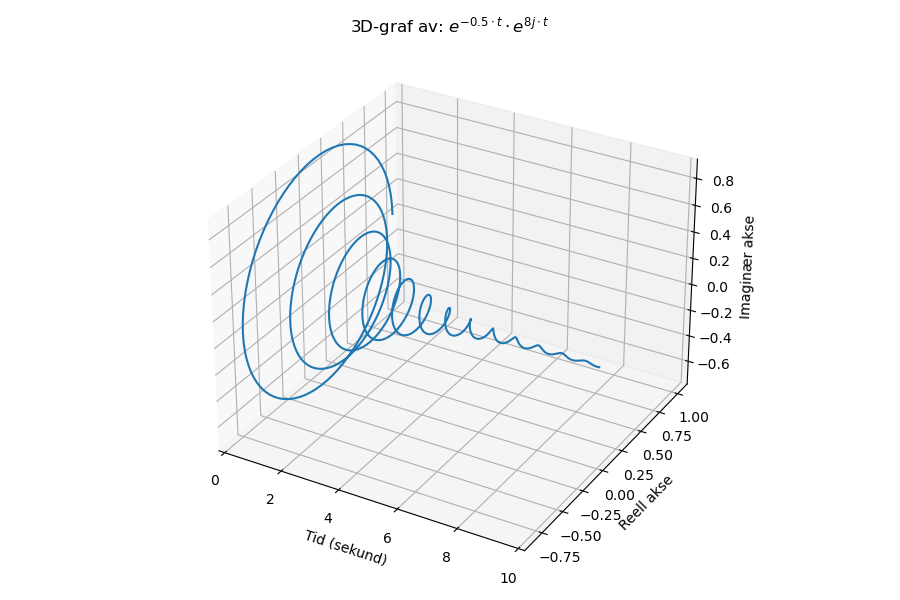

In [3]:
# Angi punkt på s-planet,
s = -0.5 + 8j
# Regn ut e^(-st),
showOscillation(s, T=10)

# Konvolusjon og transferfunksjonen $H(s)$

* Konvolusjon gir utgangssignalet $y(t)$:
\begin{equation}
y(t) = x(t) * h(t) = \int_{0}^{\infty} x(t-\tau) \cdot h(\tau) \; d\tau
\end{equation}

* Når $x(t) = e^{s\cdot t}$, blir $y(t) = \lambda \cdot e^{s\cdot t} = H(s) \cdot e^{s\cdot t}$:
$$\begin{align}
H(s) \cdot e^{st} &= \int_{0}^{\infty} e^{s(t -\tau)} \cdot h(\tau) \; d\tau \\
H(s) \cdot e^{st} &= \int_{0}^{\infty} e^{st} \cdot e^{-s \tau} \cdot h(\tau) \; d\tau \\
H(s) \cdot e^{st} &= e^{st}\cdot \int_{0}^{\infty}  e^{-s \tau} \cdot h(\tau) \; d\tau \\
H(s)  &= \int_{0}^{\infty}  e^{-s \tau} \cdot h(\tau) \; d\tau = \int_{0}^{\infty}  h(t)\cdot e^{-s t}  \; dt = \mathcal{L}(h(t))
\end{align}$$

* **Konklusjon:** 
    * Transferfunksjonen $H(s)$ til et LTI-system forteller hvordan systemet responderer til et inngangssignal $x(t) = e^{s\cdot t}$
    * $H(s)$ er laplacetransformen av systemets impulsrespons $h(t)$

# Utledning av transferfunksjon

* Det tilhører sjeldenhetene at man faktisk bruker den formelle definisjonen til å utlede laplacetransformen av $h(s)$.

1. Når $x(t)$ er antatt å være egenfunksjonen $e^{s\cdot t}$ omformes en *differensialligning* til en *algebraisk ligning*
    * Eksempel:
    
$$
\begin{align}
\frac{d^2 y(t)}{d^2 t} + 2\frac{d y(t)}{d t} + 10\cdot y(t) &= s \frac{d x(t)}{d t} + x(t) \\ \\
&\Downarrow \text{sett } x(t) = e^{s\cdot t} \text{ og } y(t) = H(s) \cdot e^{s \cdot t}\\ \\
\frac{d^2 H(s) \cdot e^{s \cdot t}}{d^2 t} + 2\frac{d H(s) \cdot e^{s \cdot t}}{d t} + 10 H(s) \cdot e^{s \cdot t} &= \frac{d e^{s \cdot t}}{dt} + e^{s \cdot t} \\ \\
s^2 H(s) \cdot e^{s \cdot t} + 2s H(s) \cdot e^{s \cdot t} + 10 H(s) \cdot e^{s \cdot t} &= s\cdot e^{s \cdot t} + e^{s \cdot t} \\ \\
s^2 H(s) + 2s H(s) + 10 H(s) &= s + 1 \\ 
H(s) \cdot \left(s^2 + 2s + 10\right) &= s+1 \\
H(s) &= \frac{s+1}{s^2+2s+10}
\end{align}
$$



2. Laplacetransformert *differensialligning* gir en *transferfunksjon* $H(s)$
    * Eksempel:
$$H(s) = \frac{Y(s)}{X(s)} = \frac{s+1}{s^2+2s+10}$$


# Poler og nullpunkt

* Faktorisering av *transferfunksjonen* $H(s)$ gir *poler* og *nullpunkt*
    * Eksempel:
$$H(s) = \frac{s - (-1)}{\left(s-(-1 + 3j)\right)\left(s-(-1-3j)\right)}$$
        * Nullpunkt: $s=-1$
        * Poler: $s=-1\pm 3j$

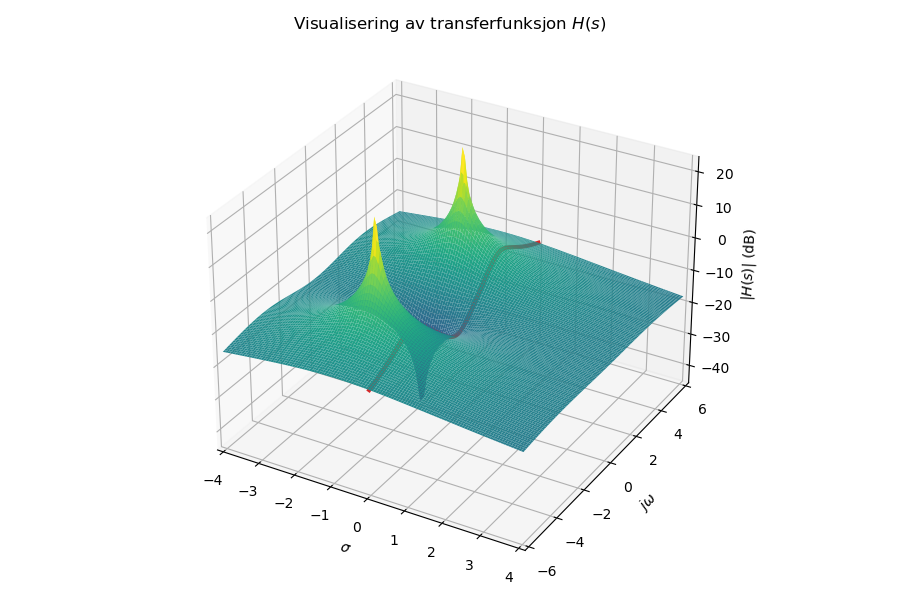

In [4]:
from Kildekode._14_Z_transformasjon import HsPlot
plt.close(2); plt.figure(2, figsize=(9,6))
HsPlot([1, 1],[1, 2, 10],axes=[-4, 4, -6, 6]) # Ikke en standard funksjon, men skrevet for å kunne lage denne visualiseringen

# Transferfunksjonen $H(s)$ og frekvensresponsen $H(\omega)$

* "Korketrekkerfunksjonen" $e^{j\omega t}$ er et spesialtilfelle av egenfunksjonen $e^{s\cdot t}$ der funksjonen er *periodisk*

$$H(\omega) = H(s)\big|_{s = j\cdot \omega}$$

* Vi kan "lese av" frekvensresponsen $H(\omega)$ til et LTI-system ved å analysere den imaginære aksen i frekvensplanet

# Forskjellen mellom tidsdiskréte tidskontinuerlige LTI-system

* Den mest vesentlige forskjellen mellom tidskontinuerlige system og digitale system er at ***derivasjon*** er erstattet med ***tidsforskyvning*** i differanseligningen.
    * Interessant å begynne med et digitalt system som utfører tidsforskyvning: 
    $$y[n] = x[n-1]$$

* Hva blir egenfunksjonen til et tidsdiskret LTI-system?

1. Diskretisér egenfunksjonen $x(t) = e^{s\cdot t}$:
$$x[n] = x(t)\big|_{t = n\cdot T_s} = e^{s \cdot T_s \cdot n}$$

2. Substituer $e^{s\cdot T_s}$ med en kompleks verdi $z$ slik at $x[n-1] = z^{-1}\cdot x[n]$ når $x[n] = z^n$:

$$x[n-1] = z^{n-1} = z^n\cdot z^{-1} = x[n] \cdot z^{-1}$$ 



3. Utled konvolusjon mellom egenfunksjonen $x[n] = z^n$ og en diskrét impulsrespons $h[n]$
$$y[n] = x[n] * h[n] = \sum_{k= 0}^{\infty} x[n-k] \cdot h[k]$$
    * Sett $y[n]=H(z)\cdot z^n$ og $x[n] = z^n$
$$
\begin{align}
H(z)\cdot z^n &= \sum_{k= 0}^{\infty} z^{n-k} \cdot h[k] \\
H(z)\cdot z^n &= \sum_{k= 0}^{\infty} z^n\cdot z^{-k} \cdot h[k] \\
H(z)\cdot z^n &= z^n\sum_{k= 0}^{\infty} z^{-k} \cdot h[k] \\
H(z) &= \sum_{k= 0}^{\infty} z^{-k} \cdot h[k]
\end{align}
$$

# Z-transformasjon
#### Notasjon:
$$\textbf{Z}(h[n]) = H(z)$$

#### Formel:
\begin{align}
H(z) &= \sum_{n=0}^{\infty} h[n]\cdot z^{-n}\\
& \text{der}\\
z &= r\cdot e^{j\hat{\omega}}
\end{align}

#### For LTI-system
* Dersom $h[n]$ er impulsresponsen til et LTI-system, forteller dette hvordan systemet vil respondere til et inngangssignal $x[n] = z^{n} = r^{n} \cdot e^{j \hat{\omega}\cdot n}$.
* Refleksjoner:
    * Dersom $|r| = 1$, reduseres den 2-dimensjonale Z-transformen til DTFT. 
    * Dersom $|r| > 1$, vil amplitudent til $z^{n}$ øke over tid.
    * Dersom $|r| < 1$, vil amplituden til $z^{n}$ synke over tid.

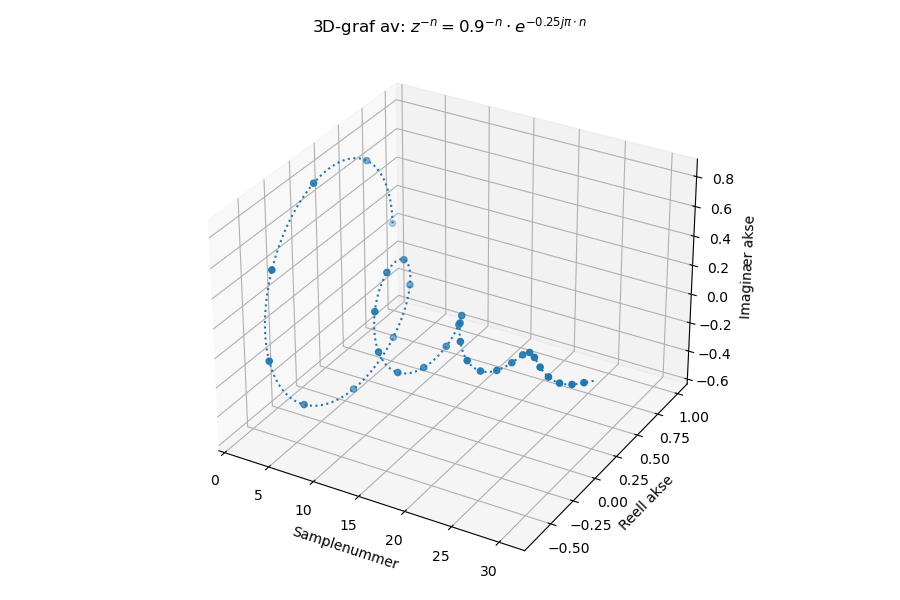

In [2]:
z = 0.9*exp(1j*pi/4)
showDiscreteOscillation(z, N=32, fig_num = 3)

# S-plan og Z-plan
## $$z = e^{s\cdot T_s}$$
<img src="Figurer/14_Ztransform/Fig2_SandZ.png" style="width: 80%; margin-left: 100px" />

## Regneeksempel 1:

* Utfør Z-transformasjon av impulsresponsen $h[n] = \frac{u[n] - u[n-4]}{4}$.

# Tidsforskyvning i Z-planet

* Hver sample tidsforskyvning tilsvarer multiplikasjon med $z^{-1}$ i z-planet. 
$$\textbf{Z}(x[n-D]) = z^{-D}\cdot X(z)$$

* I blokkskjemarepresentasjon av filter brukes derfor $z^{-1}$ for å symbolisere tidsforskyvning/delay.

<br>

<img src="Figurer/14_Ztransform/Fig4_Delay.png" style="width: 70%; margin-left: 100px" />

# LTI-filter i Z-domene

<br>

<img src="Figurer/14_Ztransform/Fig3_TF.png" style="width: 70%" align="left"/>

# Transferfunksjon / overføringsfunksjon

* Z-transformen av impulsresponen $h[n]$ til et LTI-system kalles systemets *transferfunksjon*
* For ethvert kausalt LTI-system med filterkoeffisienter **a** og **b**, vil transferfunksjonen være:
\begin{align}
H(z) = \frac{Y(z)}{X(z)} &= \frac{\sum_{k=0}^{M} b_k \cdot z^{-k}}{\sum_{k=0}^{N} a_k \cdot z^{-k}}\\
&\text{eller}\\
&= \frac{b_0 + b_1\cdot z^{-1} + b_2 \cdot z^{-2} + \ldots + b_M \cdot z^{-M}}{a_0 + a_1\cdot z^{-1} + a_2 \cdot z^{-2} + \ldots + a_N \cdot z^{-N}}
\end{align}
* Teller og nevner er polynomer
* *samme utledning som for DTFT av differanseligning*

## Regneeksempel 2:

* Finn transferfunksjonen $H(z)$ til filteret i vist i figuren:
<br>

<img src="Figurer/14_Ztransform/Fig5_ExFilt.png" style="width: 70%; margin-left: 100px" />

## Generell utledning av transferfunksjon:
<img src="Figurer/14_Ztransform/Fig9_Diff2TF.png" style="width: 70%; margin-left: 50px" />

# Visualisering av $H(z)$

* $H(z)$ funksjon av et komplekst tall.
    * "Gain" i transferfunksjonen av størst interesse
    * Et "Surface Plot" av $|H(z)|$ vil kunne gi informasjon om forsterkningen av ulike typer signal.
    * Amplituderesponsen vil kunne leses av ved å studere konturene langs enhetssirkelen.

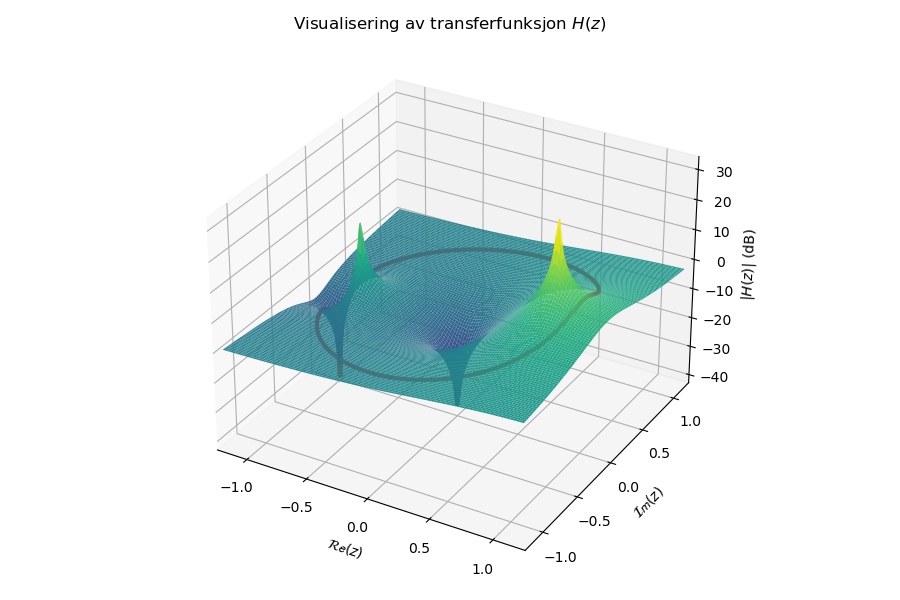

In [5]:
# Filter fra regneeksempel 1:
b = [0.5, 0.5] 
a = [1, 0, -0.64]
plt.close(4); plt.figure(4, figsize=(9,6))
tfPlot(b, a) # Ikke standardfunksjon, definert i kildekoden til forelesningen.

## Repetisjon DTFT
#### Formel

$$H\left(\hat{\omega}\right) = \sum_{n=0}^{\infty}h[n]\cdot e^{-j\hat{\omega}\cdot n}$$

#### For LTI-system

* Dersom $h[n]$ er impulsresponsen til et LTI-system, forteller dette hvordan systemet vil påvirke et inngangssignal $x[n] = e^{-j\omega \cdot n}$ med vinkelfrekvens $\hat{\omega}$.
    * Gjelder også sinusformede signal da  $\cos(\hat{\omega}\cdot n) = \frac{1}{2} e^{j\hat{\omega}\cdot n} + \frac{1}{2} e^{-j \hat{\omega} \cdot n}$.

# Z-plan og frekvensrespons

* Substitusjonen $z=e^{j\hat{\omega}}$ i transferfunksjonen $H(z)$ gir systemets frekvensrespons $H(\hat{\omega})$.

$$ H(\hat{\omega}) = H(z)\bigg|_{z = e^{j\hat{\omega}}}$$

* Frekvensresponsen er oppgitt langs ***enhetssirkelen*** i z-planet.
    * Sirkulær "frekvensakse" medfører at alle aliaser av et digitalt signal er representert av samme punkt i z-planet.
    
<img src="Figurer/14_Ztransform/Fig11_Hz2Hw.png" style="width: 90%" />

## Regneeksempel 3:
* Finn frekvensresponsen til transferfunksjonen
$$H(z) = \frac{0.5 + 0.5z^{-1}}{1-0.64z^{-2}}$$

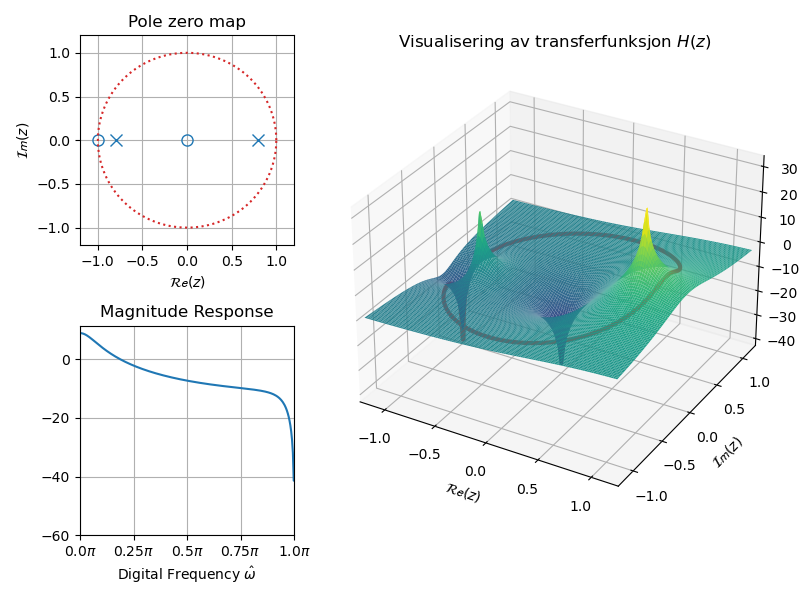

In [6]:
# Filter fra regneeksempel 1:
b = [0.5, 0.5] 
a = [1, 0, -0.64]
visualizeTF(b, a, fig_num=5) # Ikke standardfunksjon, definert i kildekoden til forelesningen.

# Oppsummering

* Analyse av IIR filtre utføres med *Z-transformasjon*
    * "Mapper" IIR-filteret til $z$-planet basert på hva responsen til et signal på formen $z^{-n}$.
    
    
* Sammenhengen mellom $s$-planet for laplace og $z$-planet fremgår av substitusjonen
$$z = e^{s \cdot T_s}$$
    * Frekvensaksen i $s$-planet avgrenses til $-\frac{F_s}{2} < f < \frac{F_s}{2}$ og "pakkes" rundt enhetssirkelen.
    * Venstre halvplan i $s$-planet flyttes til innsiden av enhetssirkelen på $z$-planet.
    
    
* Z-transforamsjon omformer en *differanseligning* til en *algebraisk ligning*
$$\begin{align}
a_0\cdot y[n] + a_1 \cdot y[n-1] + \ldots + a_N\cdot y[n-N] &= b_0\cdot x[n] + b_1 \cdot x[n-1] + \ldots + b_N\cdot x[n-M] \\
& \Downarrow \text{Z-transformasjon} \\
Y(z)\left(a_0 + a_1 \cdot z^{-1} + \ldots + a_N\cdot z^{-N} \right) &= X(z)\left(b_0 + b_1 \cdot z^{-1} + \ldots + b_N\cdot z^{-M} \right)
\end{align}$$


* Filterets frekvensrespons $H(\hat{\omega})$ finner vi ved å se på $H(z)$ langs enhetssirkelen.
$$ H(\hat{\omega}) = H(z)\big|_{z=e^{j\hat{\omega}}}$$

# Egenskaper Z-transformasjon

<img src="Figurer/14_Ztransform/Fig10_ZtransProps.png" style="width: 85%; margin-left: 50px" />

# Spørsmål?